# Customer Segmentation using RFM Analysis| K17_Hoang Tram Anh

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [336]:
filepath = r'H:\My Drive\01. DATA ANALYSIS LEARNING MATERIALS\01. Unigap_DA Course\03. Python\Final_project_RFM_Hoang Tram Anh\sales.csv'

In [337]:
df=pd.read_csv(filepath,encoding='unicode_escape')


In [338]:
def summary(df):    
    display(df.head())   
    display(df.info())
    display(df.duplicated())
    display(df.isnull().sum())
    display(df.describe([0.01,0.25,0.50,0.75,0.99]))
summary(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
1%,-2.000000,0.190000,12415.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
99%,100.000000,18.000000,18212.000000
max,80995.000000,38970.000000,18287.000000


In [339]:
# Check the entries for each column
for col in df.columns: 
    print('{} : {}'.format(col, df[col].unique()))

InvoiceNo : ['536365' '536366' '536367' ... '581585' '581586' '581587']
StockCode : ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
Description : ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity : [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     7

In [340]:
##Convert format of InvoiceDate to Date Time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [341]:
##Define Order Status for InvoiceNo starting with C letter
df['OrderStatus'] = df['InvoiceNo'].str.contains('C').apply(lambda x: 'Cancelled' if x else 'Delivered')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Delivered
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Delivered
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Delivered
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Delivered
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Delivered
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Delivered
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Delivered
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Delivered
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Delivered


In [342]:
##Filter order with positive quantity and unitprice, order is delivered and customer ID is not null
dfn = df[(df.Quantity>0) & (df.UnitPrice>0) & (df.OrderStatus =='Delivered') & (df.CustomerID.notnull())]
dfn

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Delivered
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Delivered
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Delivered
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Delivered
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Delivered
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Delivered
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Delivered
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Delivered
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Delivered


In [343]:
##Convert customer id to integer
dfn['CustomerID'] = dfn['CustomerID'].astype(int)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
 8   OrderStatus  397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 28.8+ MB


In [344]:
##Calculate Order Value
dfn['OrderValue'] = dfn['Quantity']*dfn['UnitPrice']
dfn

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderStatus,OrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Delivered,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Delivered,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Delivered,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Delivered,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Delivered,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Delivered,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Delivered,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Delivered,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Delivered,16.60


In [345]:
now =  dt.datetime(2011,12,31)
now

datetime.datetime(2011, 12, 31, 0, 0)

In [346]:
###Calculate RFM
rfmdate =  dt.datetime(2011,12,31)
dfn['Recency'] = (rfmdate - dfn['InvoiceDate']).dt.days
rfm_ord = dfn.groupby('CustomerID').agg({'Recency':'min','InvoiceNo':'count','OrderValue':'sum','CustomerID':'nunique'})
rfm_ord = rfm_ord.rename(columns={'InvoiceNo': 'Frequency', 'OrderValue': 'Monetary','CustomerID':'NumCustomers'})
rfm_ord.reset_index()                        

,CustomerID,Recency,Frequency,Monetary,NumCustomers
0,12346,346,1,77183.60,1
1,12347,23,182,4310.00,1
2,12348,96,31,1797.24,1
3,12349,39,73,1757.55,1
4,12350,331,17,334.40,1
...,...,...,...,...,...
4333,18280,298,10,180.60,1
4334,18281,201,7,80.82,1
4335,18282,28,12,178.05,1
4336,18283,24,756,2094.88,1


In [347]:
##Add segment bin values by using quartile
rfm_ord['r_quartile'] = pd.qcut(rfm_ord['Recency'],5,labels=[5,4,3,2,1])
rfm_ord['f_quartile'] = pd.qcut(rfm_ord['Frequency'],5,labels=[5,4,3,2,1])
rfm_ord['m_quartile'] = pd.qcut(rfm_ord['Monetary'],5,labels=[5,4,3,2,1])
rfm_ord['RFMScore'] = rfm_ord['r_quartile'].astype(str)+rfm_ord['f_quartile'].astype(str)+rfm_ord['m_quartile'].astype(str)
rfm_ord.reset_index()

,CustomerID,Recency,Frequency,Monetary,NumCustomers,r_quartile,f_quartile,m_quartile,RFMScore
0,12346,346,1,77183.60,1,1,5,1,151
1,12347,23,182,4310.00,1,5,1,1,511
2,12348,96,31,1797.24,1,2,3,2,232
3,12349,39,73,1757.55,1,4,2,2,422
4,12350,331,17,334.40,1,1,4,4,144
...,...,...,...,...,...,...,...,...,...
4333,18280,298,10,180.60,1,1,5,5,155
4334,18281,201,7,80.82,1,1,5,5,155
4335,18282,28,12,178.05,1,5,5,5,555
4336,18283,24,756,2094.88,1,5,1,1,511


In [348]:
##Assign a segmentation name
segment_map = {
    "Lost customers": ['111', '112', '121', '131','141','151'],    
    "Hibernating customers": ['332', '322', '233', '232', '223', '222', '132', '123', '122', '212', '211'],
    "Can't Lose":['155', '154', '144', '214','215','115', '114', '113'],
    "At Risk": ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124'],
    "About to Sleep": ['331', '321', '312', '221', '213', '231', '241', '251'],
    "Need Attention": ['535', '534', '443', '434', '343', '334', '325', '324'],   
    "Promising": ['525', '524', '523', '522', '521', '515', '514', '513', '425','424', '413','414','415', '315', '314', '313'],
    "New Customers": ['512', '511', '422', '421', '412', '411', '311'],
    "Potential Loyalists": ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323'],
    "Loyal Customers": ['543', '444', '435', '355', '354', '345', '344', '335'],   
    "Champions": ['555', '554', '544', '545', '454', '455', '445']
}

def assign_segmentation_name(rfm_score):
    for segment, values in segment_map.items():
        if rfm_score in values:
            return segment
    return "Unknown"

rfm_ord['Segment'] = rfm_ord['RFMScore'].apply(assign_segmentation_name)
rfm_ord.reset_index()

,CustomerID,Recency,Frequency,Monetary,NumCustomers,r_quartile,f_quartile,m_quartile,RFMScore,Segment
0,12346,346,1,77183.60,1,1,5,1,151,Lost customers
1,12347,23,182,4310.00,1,5,1,1,511,New Customers
2,12348,96,31,1797.24,1,2,3,2,232,Hibernating customers
3,12349,39,73,1757.55,1,4,2,2,422,New Customers
4,12350,331,17,334.40,1,1,4,4,144,Can't Lose
...,...,...,...,...,...,...,...,...,...,...
4333,18280,298,10,180.60,1,1,5,5,155,Can't Lose
4334,18281,201,7,80.82,1,1,5,5,155,Can't Lose
4335,18282,28,12,178.05,1,5,5,5,555,Champions
4336,18283,24,756,2094.88,1,5,1,1,511,New Customers


In [349]:
rfm_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 12346 to 18287
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Recency       4338 non-null   int64   
 1   Frequency     4338 non-null   int64   
 2   Monetary      4338 non-null   float64 
 3   NumCustomers  4338 non-null   int64   
 4   r_quartile    4338 non-null   category
 5   f_quartile    4338 non-null   category
 6   m_quartile    4338 non-null   category
 7   RFMScore      4338 non-null   object  
 8   Segment       4338 non-null   object  
dtypes: category(3), float64(1), int64(3), object(2)
memory usage: 250.6+ KB


In [367]:
total_customers = rfm_ord['NumCustomers'].sum()
rfm_ord['SegmentShare']= (rfm_ord['NumCustomers']/total_customers)*100
rfm_ord

,Recency,Frequency,Monetary,NumCustomers,r_quartile,f_quartile,m_quartile,RFMScore,Segment,SegmentShare
CustomerID,,,,,,,,,,
12346,346,1,77183.60,1,1,5,1,151,Lost customers,0.023052
12347,23,182,4310.00,1,5,1,1,511,New Customers,0.023052
12348,96,31,1797.24,1,2,3,2,232,Hibernating customers,0.023052
12349,39,73,1757.55,1,4,2,2,422,New Customers,0.023052
12350,331,17,334.40,1,1,4,4,144,Can't Lose,0.023052
...,...,...,...,...,...,...,...,...,...,...
18280,298,10,180.60,1,1,5,5,155,Can't Lose,0.023052
18281,201,7,80.82,1,1,5,5,155,Can't Lose,0.023052
18282,28,12,178.05,1,5,5,5,555,Champions,0.023052


In [368]:
final = rfm_ord.groupby('Segment').agg({'NumCustomers':'sum','SegmentShare':'sum','Recency':'mean','Frequency':'mean','Monetary':'mean'}).sort_values('NumCustomers',ascending=False).reset_index()
final

,Segment,NumCustomers,SegmentShare,Recency,Frequency,Monetary
0,New Customers,849,19.571231,38.210836,287.025913,6586.788422
1,At Risk,772,17.796219,192.527202,24.411917,429.370637
2,Hibernating customers,511,11.779622,129.757339,76.774951,1325.226027
3,Can't Lose,501,11.549101,295.019960,13.157685,240.134471
4,Potential Loyalists,488,11.249424,48.770492,44.129098,1563.955801
5,Loyal Customers,368,8.483172,64.956522,19.203804,285.235734
6,Promising,307,7.076994,32.697068,104.234528,1898.830163
7,Champions,198,4.564315,36.434343,11.631313,219.204343
8,Need Attention,179,4.126325,55.620112,42.329609,449.522346
9,About to Sleep,139,3.204242,95.266187,118.244604,2732.790000


# A. RFM Analysis Insights


### 1. Segment Size
### Overall, a significant portion of customer base is from New Customers segment (19.5%), followed by "At Risk" and "Hibernating Customers" segments at 17.7% and 12.9% respectively
### 'Loyal' and 'Champion' Segment only accounts for roughly 13% of customer pool, however a positive new is that the rate of Lost Customers is quite negligible (around 0.5%)


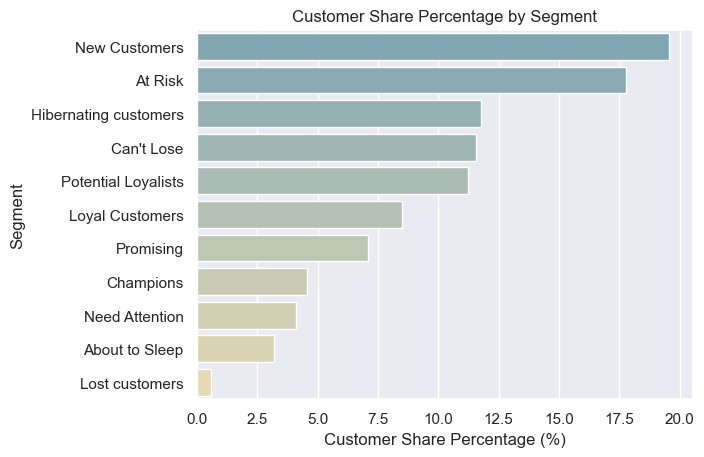

In [381]:
colors = sns.color_palette("blend:#7AB,#EDA", len(final))
sns.barplot(
    y='Segment',
    x='SegmentShare',
    data=final,
    palette=colors
)
plt.title('Customer Share Percentage by Segment')
plt.xlabel('Customer Share Percentage (%)')
plt.ylabel('Segment')
plt.show()

### 2. Recency:

### Looking at Recency by Segment, "New Customers" recent purchase happens in average 38 days, which even lower than avg recency of 'Loyal' users (64 days), indicating a potential for developing a long term relationship and convert them into 'Loyal' buyers

### Segment of "Can't Lose" with a share of 11.5% user pool got the highest recency at average of almost 300 days to purchase

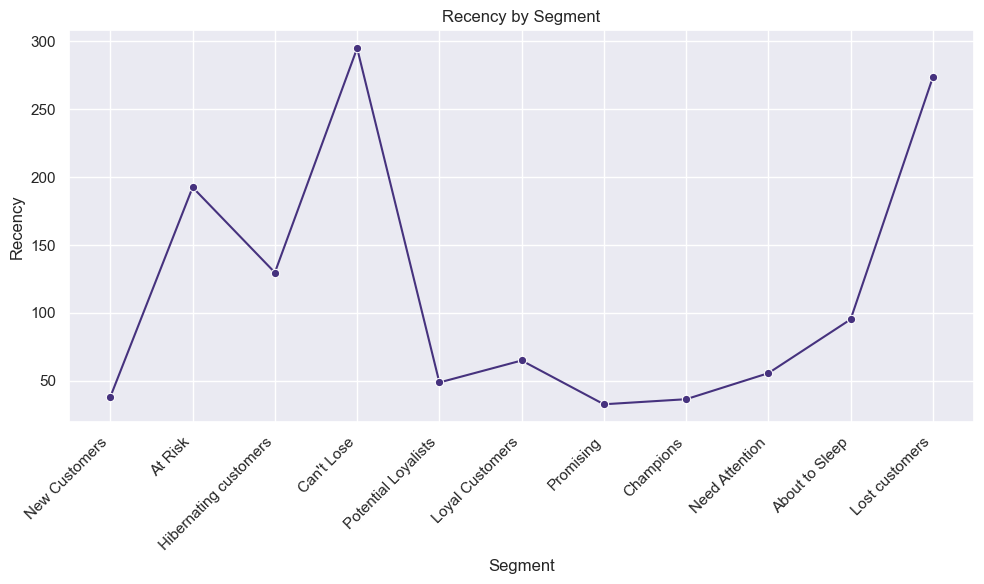

In [392]:

sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Segment', y='Recency', data=final, marker='o')
plt.title('Recency by Segment')
plt.xlabel('Segment')
plt.ylabel('Recency')

plt.xticks(rotation=45, ha='right')
# Show the plot
plt.tight_layout()
plt.show()

### 3. Frequency
### "Promising" and "New Customers" tends to repeat purchase more with a significant high frequency rate
### while "Champions" and "Loyal" doesn't have much motivation, proven by an avg frequency is just 11 to 19 orders


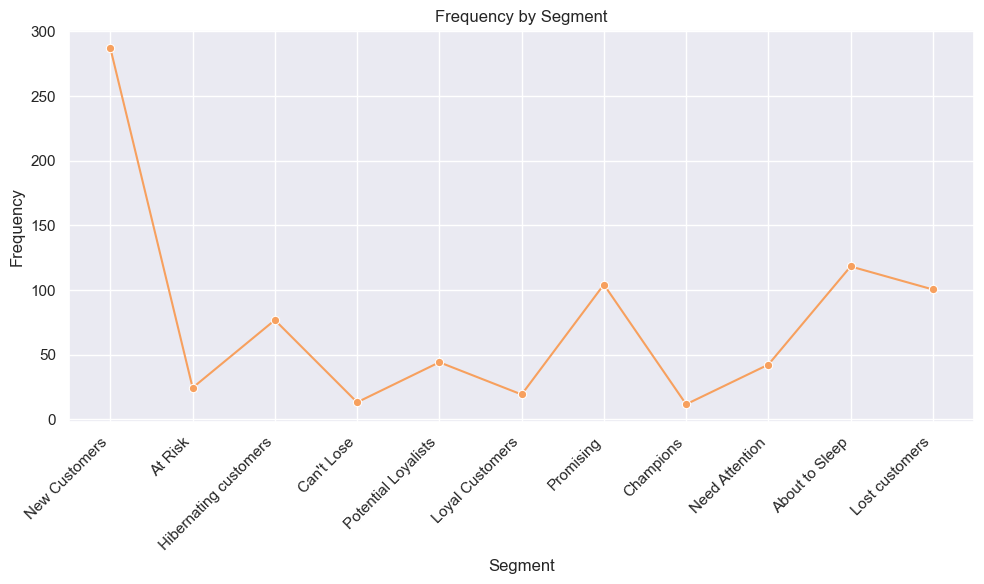

In [394]:

sns.set_palette("Oranges_d")

plt.figure(figsize=(10, 6))
sns.lineplot(x='Segment', y='Frequency', data=final, marker='o')

plt.title('Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### 4. LifeTime Monetary

### "Lost Customers" have the highest monetary value on average, which may indicate they were high-value customers before they became inactive.
### "About to Sleep" customers have the highest average monetary value, suggesting they have the potential for higher spending.


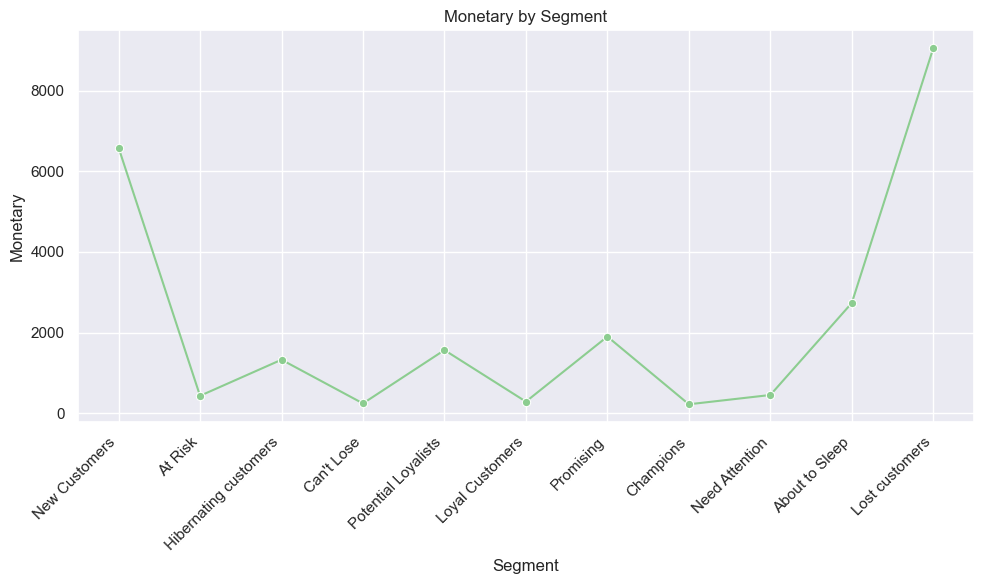

In [395]:

sns.set_palette("Greens_d")

plt.figure(figsize=(10, 6))
sns.lineplot(x='Segment', y='Monetary', data=final, marker='o')

plt.title('Monetary by Segment')
plt.xlabel('Segment')
plt.ylabel('Monetary')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# B. RFM Recommendations

### 1. Focus on retaining "New Customers", "Potential Loyal", "Promising"  by providing excellent service and personalized offers to encourage repeat purchases. We might collect feedback to understand their evolving needs and preferences

### 2. For "At Risk", "Need Attention", "About to Sleep", "Lost Customers": should reach out these groups customers with targeted promotions and incentives to re-engage them, collecting their feedback to understand their concerns and work on improving their experience

### 3. For "Hibernating customers": Should develop reactivation campaigns to bring these customers back into the active customer base

### 4. For "Can't Lose","Loyal", "Champion": provide VIP treatment, early access to products, and exclusive events to reinforce their loyalty example like encourage champions to become brand advocates and provide referrals. 


